In [2]:
# Libraries

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV

In [3]:
# Reading the train data
df = pd.read_csv("/Users/surajsharma/Desktop/AIPM_Bootcamp/Group-3-Expedia-Hotel-Recommendation/data/train_bookings_1.csv")
df.head()

,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,...,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
0,2014-08-11 07:46:59,2,3,66,348,48862,2234.2641,12,0,1,...,0,1,8250,1,0,3,2,50,628,1
1,2014-08-11 08:22:12,2,3,66,348,48862,2234.2641,12,0,1,...,0,1,8250,1,1,1,2,50,628,1
2,2014-02-27 18:01:32,2,3,66,318,52078,NaN,756,0,1,...,0,1,8291,1,1,1,2,50,191,2
3,2013-06-15 15:38:05,30,4,195,548,56440,NaN,1048,0,1,...,0,1,1385,1,1,1,0,185,185,58
4,2014-11-23 18:02:20,30,4,195,991,47725,NaN,1048,0,0,...,0,1,8803,1,1,1,3,151,69,36


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000001 entries, 0 to 1000000
Data columns (total 24 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   date_time                  1000001 non-null  object 
 1   site_name                  1000001 non-null  int64  
 2   posa_continent             1000001 non-null  int64  
 3   user_location_country      1000001 non-null  int64  
 4   user_location_region       1000001 non-null  int64  
 5   user_location_city         1000001 non-null  int64  
 6   orig_destination_distance  661222 non-null   float64
 7   user_id                    1000001 non-null  int64  
 8   is_mobile                  1000001 non-null  int64  
 9   is_package                 1000001 non-null  int64  
 10  channel                    1000001 non-null  int64  
 11  srch_ci                    1000001 non-null  object 
 12  srch_co                    1000001 non-null  object 
 13  srch_adults_

In [5]:
# missing values
df.isnull().sum()

date_time                         0
site_name                         0
posa_continent                    0
user_location_country             0
user_location_region              0
user_location_city                0
orig_destination_distance    338779
user_id                           0
is_mobile                         0
is_package                        0
channel                           0
srch_ci                           0
srch_co                           0
srch_adults_cnt                   0
srch_children_cnt                 0
srch_rm_cnt                       0
srch_destination_id               0
srch_destination_type_id          0
is_booking                        0
cnt                               0
hotel_continent                   0
hotel_country                     0
hotel_market                      0
hotel_cluster                     0
dtype: int64

In [6]:
# unique values in each column
df.nunique()

date_time                    988343
site_name                        43
posa_continent                    5
user_location_country           227
user_location_region            904
user_location_city            24512
orig_destination_distance    523677
user_id                      269624
is_mobile                         2
is_package                        2
channel                          11
srch_ci                        1104
srch_co                        1109
srch_adults_cnt                  10
srch_children_cnt                10
srch_rm_cnt                       9
srch_destination_id           25558
srch_destination_type_id          9
is_booking                        2
cnt                              14
hotel_continent                   7
hotel_country                   202
hotel_market                   2076
hotel_cluster                   100
dtype: int64

In [7]:
# checking duplicate rows
df.duplicated().sum()

0

In [8]:
# parse only the datetime columns
df['date_time'] = pd.to_datetime(df['date_time'])
df['srch_ci']   = pd.to_datetime(df['srch_ci'], errors='coerce')
df['srch_co']   = pd.to_datetime(df['srch_co'], errors='coerce')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000001 entries, 0 to 1000000
Data columns (total 24 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   date_time                  1000001 non-null  datetime64[ns]
 1   site_name                  1000001 non-null  int64         
 2   posa_continent             1000001 non-null  int64         
 3   user_location_country      1000001 non-null  int64         
 4   user_location_region       1000001 non-null  int64         
 5   user_location_city         1000001 non-null  int64         
 6   orig_destination_distance  661222 non-null   float64       
 7   user_id                    1000001 non-null  int64         
 8   is_mobile                  1000001 non-null  int64         
 9   is_package                 1000001 non-null  int64         
 10  channel                    1000001 non-null  int64         
 11  srch_ci                    1000001 no

In [10]:
# add new column length_of_stay
df['length_of_stay'] = (df['srch_co'] - df['srch_ci']).dt.days

In [11]:
df['length_of_stay'].describe()

count    1.000001e+06
mean     2.425105e+00
std      2.021650e+00
min     -9.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      3.000000e+00
max      3.300000e+01
Name: length_of_stay, dtype: float64

In [12]:
df['length_of_stay'].unique()

array([ 4,  2,  8,  5,  3,  1,  6, 12, 10,  7, 15,  9, 14, 13, 22, 11, 21,
       17, 19, 20, 18, 16, 28, 27, 24, 23, 25, 26, 30, 31, -9, 33])

In [13]:
# from df dataframe, remove rows where length_of_stay < 0
df = df[df['length_of_stay'] >= 0]
df.shape

(1000000, 25)

In [14]:
df['length_of_stay'].nunique()

31

In [15]:
# How many clusters? Which are most common?
df['hotel_cluster'].nunique(), df['hotel_cluster'].value_counts().head(20)

(100,
 hotel_cluster
 91    40385
 48    28908
 42    24499
 59    22070
 28    21108
 16    18881
 18    18723
 95    18367
 50    18213
 82    18030
 21    17202
 41    16408
 98    16327
 64    16045
 25    15361
 46    15360
 2     15127
 9     15091
 6     14748
 47    14713
 Name: count, dtype: int64)

### Train-test split

In [16]:
# Split the data into features and target variable
X = df.drop(columns=['hotel_cluster'])
y = df['hotel_cluster']


In [17]:
# Train-test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,       # 20% test set
    random_state=42,     # reproducible split
    stratify=y           # keep same class distribution
)


In [18]:
# verify the shape of the splits
print("Train features:", X_train.shape)
print("Test features:", X_test.shape)
print("Train labels:", y_train.shape)
print("Test labels:", y_test.shape)


Train features: (800000, 24)
Test features: (200000, 24)
Train labels: (800000,)
Test labels: (200000,)


In [19]:
from sklearn.linear_model import LogisticRegression

# 1) Drop datetime columns
drop_cols = ['date_time', 'srch_ci', 'srch_co']
X_train_ = X_train.drop(columns=drop_cols)
X_test_  = X_test.drop(columns=drop_cols)

# 2) Handle missing values
X_train_ = X_train_.fillna(-1)
X_test_  = X_test_.fillna(-1)


### Logistic Regression without scaling the features

In [20]:
# 3) Train Logistic Regression
model = LogisticRegression(max_iter=500, random_state=42, n_jobs=-1)
model.fit(X_train_, y_train)

/Users/surajsharma/Desktop/AIPM_Bootcamp/Group-3-Expedia-Hotel-Recommendation/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=500, n_jobs=-1, random_state=42)

In [22]:
# 4) Predict
y_pred = model.predict(X_test_)

from sklearn.metrics import accuracy_score, classification_report
# 5) Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.04374
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1298
           1       0.00      0.00      0.00      2541
           2       0.00      0.00      0.00      3025
           3       0.00      0.00      0.00       826
           4       0.00      0.00      0.00      2390
           5       0.00      0.00      0.00      2866
           6       0.00      0.00      0.00      2950
           7       0.00      0.00      0.00      2331
           8       0.00      0.00      0.00      1470
           9       0.00      0.00      0.00      3018
          10       0.00      0.00      0.00      2081
          11       0.00      0.00      0.00      1868
          12       0.00      0.00      0.00      1081
          13       0.00      0.00      0.00      2880
          14       0.00      0.00      0.00      1040
          15       0.00      0.00      0.00      2623
          16       0.00      0.00      0.00      3776
         

#### Logistic Regression after scaling the features and introducing hyperparameter solver='saga'

In [30]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_)
X_test_scaled  = scaler.transform(X_test_)


In [31]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(
    solver="saga",          # good for large, sparse-ish data
    multi_class="multinomial",
    max_iter=200,
    random_state=42,
    n_jobs=-1
)
logreg.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=200, multi_class='multinomial', n_jobs=-1,
                   random_state=42, solver='saga')

In [32]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = logreg.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, zero_division=0))


Accuracy: 0.0693
              precision    recall  f1-score   support

           0       0.06      0.01      0.01      1298
           1       0.08      0.36      0.13      2541
           2       0.06      0.04      0.05      3025
           3       0.00      0.00      0.00       826
           4       0.00      0.00      0.00      2390
           5       0.05      0.02      0.03      2866
           6       0.00      0.00      0.00      2950
           7       0.01      0.00      0.00      2331
           8       0.11      0.01      0.02      1470
           9       0.04      0.06      0.04      3018
          10       0.03      0.00      0.00      2081
          11       0.00      0.00      0.00      1868
          12       0.06      0.09      0.07      1081
          13       0.00      0.00      0.00      2880
          14       0.00      0.00      0.00      1040
          15       0.04      0.01      0.01      2623
          16       0.03      0.00      0.00      3776
          

### Linear Regression (This time we also drop other non-relevant features)

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# 1) Drop datetime cols
drop_cols = [
    'date_time', 'srch_ci', 'srch_co',
    'cnt', 'is_booking', 'user_id',
    'srch_destination_id', 'srch_destination_type_id',
    'hotel_country', 'hotel_market'
]

X_train_lr = X_train.drop(columns=drop_cols).fillna(-1)
X_test_lr  = X_test.drop(columns=drop_cols).fillna(-1)

# 2) Train Linear Regression
linreg = LinearRegression()
linreg.fit(X_train_lr, y_train)

# 3) Predict (continuous values)
y_pred_cont = linreg.predict(X_test_lr)

# 4) Round to nearest int to compare with hotel_cluster
y_pred_round = np.rint(y_pred_cont).astype(int)

# 5) Evaluate
mse = mean_squared_error(y_test, y_pred_cont)
r2  = r2_score(y_test, y_pred_cont)
acc = (y_pred_round == y_test).mean()

print("MSE:", mse)
print("R²:", r2)
print("Rounded Accuracy:", acc)


MSE: 841.2169768641178
R²: 0.002472509922123889
Rounded Accuracy: 0.01898


### Takeaway: It seems Regression is a no-go

### Random Forest

In [36]:
drop_cols = [
    'date_time', 'srch_ci', 'srch_co',
    'cnt', 'is_booking', 'user_id',
    'srch_destination_id', 'srch_destination_type_id',
    'hotel_country', 'hotel_market'
]

X_train_rf = X_train.drop(columns=drop_cols).fillna(-1)
X_test_rf  = X_test.drop(columns=drop_cols).fillna(-1)


In [37]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=100,   # number of trees
    max_depth=15,       # limit depth to avoid huge trees
    random_state=42,
    n_jobs=-1           # use all CPU cores
)
rf.fit(X_train_rf, y_train)


RandomForestClassifier(max_depth=15, n_jobs=-1, random_state=42)

In [38]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = rf.predict(X_test_rf)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, zero_division=0))


Accuracy: 0.09282
              precision    recall  f1-score   support

           0       0.15      0.18      0.17      1298
           1       0.14      0.54      0.22      2541
           2       0.09      0.07      0.08      3025
           3       0.15      0.01      0.01       826
           4       0.14      0.02      0.04      2390
           5       0.09      0.03      0.05      2866
           6       0.21      0.02      0.03      2950
           7       0.10      0.00      0.00      2331
           8       0.19      0.10      0.13      1470
           9       0.12      0.02      0.04      3018
          10       0.25      0.02      0.03      2081
          11       0.10      0.01      0.02      1868
          12       0.12      0.21      0.15      1081
          13       0.11      0.01      0.01      2880
          14       0.12      0.00      0.01      1040
          15       0.17      0.01      0.02      2623
          16       0.17      0.01      0.02      3776
         

#### Random Forests with Feature Importances

In [39]:
import pandas as pd

feat_importances = pd.DataFrame({
    "feature": X_train_rf.columns,
    "importance": rf.feature_importances_
}).sort_values(by="importance", ascending=False)


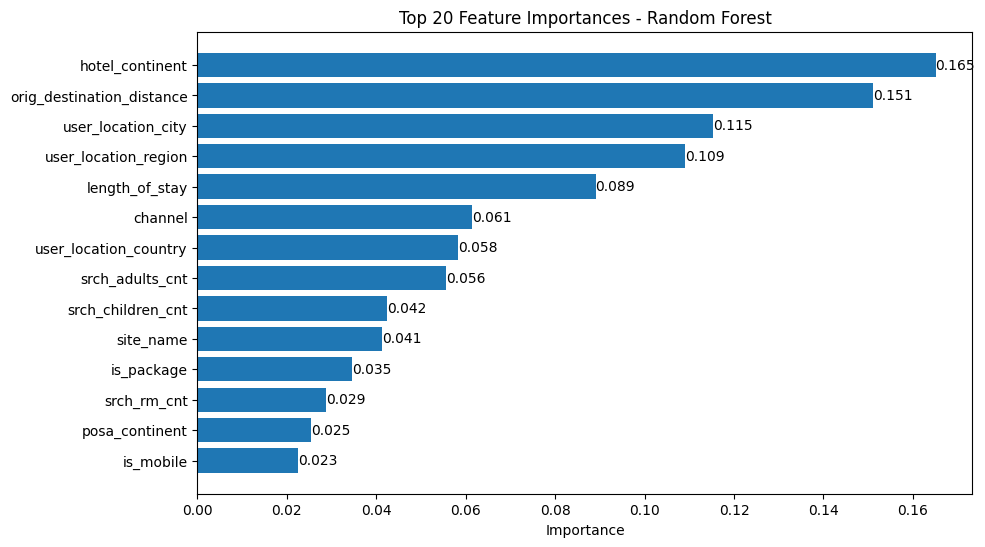

In [43]:
import matplotlib.pyplot as plt

top_n = 20
top_feats = feat_importances.head(top_n)

plt.figure(figsize=(10,6))
bars = plt.barh(top_feats["feature"], top_feats["importance"])
plt.gca().invert_yaxis()  # highest on top
plt.xlabel("Importance")
plt.title(f"Top {top_n} Feature Importances - Random Forest")

# Add text labels
for bar, imp in zip(bars, top_feats["importance"]):
    plt.text(
        bar.get_width(), 
        bar.get_y() + bar.get_height()/2,
        f"{imp:.3f}",   # format to 3 decimals
        va="center", ha="left"
    )

plt.show()


In [45]:
# Creating a fallback dataframe of df before I modify it further
df_fallback = df.copy()

### Back to Logistic Regression for a bit, this time with OHE

In [46]:
# Identify categorical columns for OHE
categorical_cols = [
    'posa_continent',   # 5
    'hotel_continent',  # 7
    'channel',          # 11
    'is_package',       # 2
    'is_mobile'         # 2
]


In [54]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier

categorical_cols = ['posa_continent','hotel_continent','channel','is_package','is_mobile']
numeric_cols = [c for c in X_train_lr.columns if c not in categorical_cols]

pre = ColumnTransformer(
    [
        ('cat', Pipeline([
            ('imp', SimpleImputer(strategy='most_frequent')),
            ('ohe', OneHotEncoder(handle_unknown='ignore',
                                  sparse_output=True,
                                  dtype='float32'))
        ]), categorical_cols),
        ('num', Pipeline([
            ('imp', SimpleImputer(strategy='median')),
            ('sc', StandardScaler(with_mean=False))
        ]), numeric_cols),
    ],
    remainder='drop'
)

sgd_logreg = SGDClassifier(
    loss='log_loss',     # logistic regression
    penalty='l2',
    alpha=1e-4,
    early_stopping=True, # fast + prevents overfitting
    n_iter_no_change=3,
    max_iter=1000,
    tol=1e-3,
    random_state=42
)



In [ ]:
# Fitting the pipeline
pipe = Pipeline([('pre', pre), ('clf', sgd_logreg)])
pipe.fit(X_train_lr, y_train)

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('imp',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(dtype='float32',
                                                                                 handle_unknown='ignore'))]),
                                                  ['posa_continent',
                                                   'hotel_continent', 'channel',
                                                   'is_package', 'is_mobile']),
                                                 ('num',
                                                  Pipeline(steps=[('imp',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('sc',
                                                                   StandardScaler(with_mean=False))]),
                                                  ['site_name',
                                                   'user_location_country',
                                                   'user_location_region',
                                                   'user_location_city',
                                                   'orig_destination_distance',
                                                   'srch_adults_cnt',
                                                   'srch_children_cnt',
                                                   'srch_rm_cnt',
                                                   'length_of_stay'])])),
                ('clf',
                 SGDClassifier(early_stopping=True, loss='log_loss',
                               n_iter_no_change=3, random_state=42))])

In [56]:
from sklearn.metrics import accuracy_score

y_pred = pipe.predict(X_test_lr)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.06852


#### Introducing top 5 accuracy in logistic regression

In [57]:
import numpy as np

def softmax(z):
    z = z - z.max(axis=1, keepdims=True)
    return np.exp(z) / np.exp(z).sum(axis=1, keepdims=True)

# Try predict_proba; if unavailable, fall back to decision_function + softmax
try:
    proba = pipe.predict_proba(X_test_lr)
except AttributeError:
    scores = pipe.decision_function(X_test_lr)   # shape: [n_samples, n_classes]
    proba = softmax(scores)

top5_idx = np.argsort(proba, axis=1)[:, -5:]     # indices of top-5 classes
top5_hit = np.fromiter((yt in row for yt, row in zip(y_test, top5_idx)), bool)
print("Top-5 Accuracy:", top5_hit.mean())


Top-5 Accuracy: 0.23025


## Focusing on Classification model

In [20]:
# Random Forest with Top-5 Accuracy (Baseline)
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# Drop irrelevant / leakage columns
drop_cols = [
    'date_time', 'srch_ci', 'srch_co',
    'cnt', 'is_booking', 'user_id',
    'srch_destination_id', 'srch_destination_type_id',
    'hotel_country', 'hotel_market'
]

X_train_rf = X_train.drop(columns=drop_cols).fillna(-1)
X_test_rf  = X_test.drop(columns=drop_cols).fillna(-1)

# Random Forest
rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=15,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train_rf, y_train)

# Predictions
y_pred = rf.predict(X_test_rf)
print("Top-1 Accuracy:", accuracy_score(y_test, y_pred))

# --- Top-5 Accuracy ---
proba = rf.predict_proba(X_test_rf)
top5 = np.argsort(proba, axis=1)[:, -5:]
top5_acc = np.mean([y in row for y, row in zip(y_test, top5)])
print("Top-5 Accuracy:", top5_acc)


Top-1 Accuracy: 0.09282
Top-5 Accuracy: 0.28971


### Feature Engineering

In [21]:
# Fill missing numerical values with median
X_train['orig_destination_distance'].fillna(X_train['orig_destination_distance'].median(), inplace=True)
X_test['orig_destination_distance'].fillna(X_train['orig_destination_distance'].median(), inplace=True)

In [22]:
# Apply log-transform to orig_destination_distance
X_train['orig_destination_distance'] = np.log1p(X_train['orig_destination_distance'])
X_test['orig_destination_distance'] = np.log1p(X_test['orig_destination_distance'])

#### Introducing 4 new features

In [23]:
# ensure datetime (won’t hurt if already done)
for df_ in (X_train, X_test):
    df_['srch_ci'] = pd.to_datetime(df_['srch_ci'], errors='coerce')
    df_['date_time'] = pd.to_datetime(df_['date_time'], errors='coerce')

# 1) month of check-in  2) weekday of check-in  3) was the search on weekend?  4) days between search and check-in
for df_ in (X_train, X_test):
    df_['checkin_month'] = df_['srch_ci'].dt.month.fillna(-1).astype('int16')
    df_['checkin_weekday'] = df_['srch_ci'].dt.weekday.fillna(-1).astype('int8')
    df_['is_weekend'] = df_['date_time'].dt.weekday.ge(5).fillna(False).astype('int8')
    df_['advance_days'] = (df_['srch_ci'] - df_['date_time']).dt.days
    df_['advance_days'] = df_['advance_days'].fillna(-1).clip(lower=-1).astype('int16')


In [24]:
# Preview the new features
X_train[['checkin_month','checkin_weekday','is_weekend','advance_days']].head()


,checkin_month,checkin_weekday,is_weekend,advance_days
275825,7,3,0,23
442208,5,3,0,-1
844070,2,2,0,14
815699,5,6,1,20
129347,5,6,1,34


### Retraining model after Feature Engg

In [25]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, top_k_accuracy_score

# 1) Drop raw datetime columns (we've already derived features from them)
for df_ in (X_train, X_test):
    for c in ['srch_ci', 'srch_co', 'date_time']:
        if c in df_.columns:
            df_.drop(columns=c, inplace=True)

# 2) Encode any remaining object/string columns to integers (simple + safe for trees)
cat_cols = X_train.select_dtypes(include=['object']).columns
for col in cat_cols:
    # make one mapping from TRAIN values; unseen in test -> -1
    mapping = {v: i for i, v in enumerate(X_train[col].astype(str).unique())}
    X_train[col] = X_train[col].astype(str).map(mapping).fillna(-1).astype('int32')
    X_test[col]  = X_test[col].astype(str).map(mapping).fillna(-1).astype('int32')

# 3) Fit + evaluate
rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=15,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
y_proba = rf.predict_proba(X_test)

top1 = accuracy_score(y_test, y_pred)
top5 = top_k_accuracy_score(y_test, y_proba, k=5)

print("Top-1 Accuracy:", top1)
print("Top-5 Accuracy:", top5)


Top-1 Accuracy: 0.16604
Top-5 Accuracy: 0.46213


### Handling Categorical Features
- Frequency encoding (For high cardinality columns like user_location_city)
- One-hot for low cardinality features (channel)
- Gradient Boosting (HGB)

In [26]:
import numpy as np, pandas as pd, gc

high_card_cols = [c for c in ['user_location_city','user_location_region','hotel_market'] if c in X_train.columns]

# drop old freq cols if you re-run
for col in high_card_cols:
    for df_ in (X_train, X_test):
        if col + '_freq' in df_.columns:
            df_.drop(columns=col + '_freq', inplace=True)

# compute counts on TRAIN only; map to both
for col in high_card_cols:
    vc = X_train[col].value_counts()
    X_train[col + '_freq'] = X_train[col].map(vc).fillna(0).astype('int32')
    X_test[col + '_freq']  = X_test[col].map(vc).fillna(0).astype('int32')

gc.collect()
print("Freq-enc added:", [c+'_freq' for c in high_card_cols])


Freq-enc added: ['user_location_city_freq', 'user_location_region_freq', 'hotel_market_freq']


In [27]:
low_card = [c for c in ['channel'] if c in X_train.columns]
if low_card:
    X_train = pd.get_dummies(X_train, columns=low_card, dtype='int8')
    X_test  = pd.get_dummies(X_test,  columns=low_card, dtype='int8')
    # align test columns to train
    X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

gc.collect()
print("Dummies done. Shapes:", X_train.shape, X_test.shape)


Dummies done. Shapes: (800000, 38) (200000, 38)


In [28]:
# replace inf, fill NaNs; then downcast big dtypes
for df_ in (X_train, X_test):
    df_.replace([np.inf, -np.inf], np.nan, inplace=True)
    df_.fillna(-1, inplace=True)

# downcast float64 -> float32, int64 -> int32
float_cols = X_train.select_dtypes(include=['float64']).columns
int_cols   = X_train.select_dtypes(include=['int64']).columns
X_train[float_cols] = X_train[float_cols].astype('float32')
X_test[float_cols]  = X_test[float_cols].astype('float32')
X_train[int_cols]   = X_train[int_cols].astype('int32')
X_test[int_cols]    = X_test[int_cols].astype('int32')

gc.collect()
print("Downcast complete.")


Downcast complete.


In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, top_k_accuracy_score

rf = RandomForestClassifier(
    n_estimators=150,     # lighter than 400 for RAM
    max_depth=20,        # cap depth to control size
    min_samples_leaf=2,
    max_features='sqrt',
    bootstrap=True,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
y_proba = rf.predict_proba(X_test)

rf_top1 = accuracy_score(y_test, y_pred)
rf_top5 = top_k_accuracy_score(y_test, y_proba, k=5)
print(f"[RF ] Top-1: {rf_top1:.5f} | Top-5: {rf_top5:.5f}")


[RF ] Top-1: 0.20203 | Top-5: 0.51397


In [30]:
import numpy as np

# whichever you created earlier
high_card_cols = [c for c in ['user_location_city','user_location_region','hotel_market'] if c in X_train.columns]

# add log1p of *_freq
for col in high_card_cols:
    fcol = col + '_freq'
    if fcol in X_train.columns:
        X_train[fcol + '_log'] = np.log1p(X_train[fcol]).astype('float32')
        X_test[fcol + '_log']  = np.log1p(X_test[fcol]).astype('float32')

print("Added:", [c+'_freq_log' for c in high_card_cols])


Added: ['user_location_city_freq_log', 'user_location_region_freq_log', 'hotel_market_freq_log']


In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, top_k_accuracy_score

rf = RandomForestClassifier(
    n_estimators=300,     # up from 150
    max_depth=24,        # still capped to control size
    min_samples_leaf=2,
    max_features='sqrt',
    bootstrap=True,
    oob_score=True,      # quick overfit sanity check
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
y_proba = rf.predict_proba(X_test)

print("OOB score (rough):", getattr(rf, "oob_score_", None))
print(f"[RF ] Top-1: {accuracy_score(y_test, y_pred):.5f} | Top-5: {top_k_accuracy_score(y_test, y_proba, k=5):.5f}")


OOB score (rough): 0.22565625
[RF ] Top-1: 0.22897 | Top-5: 0.54304


### More features and trying to make classes balanced

In [33]:
import numpy as np, pandas as pd, gc

for df_ in (X_train, X_test):
    # total guests
    if 'total_guests' not in df_.columns and {'srch_adults_cnt','srch_children_cnt'}.issubset(df_.columns):
        df_['total_guests'] = (df_['srch_adults_cnt'] + df_['srch_children_cnt']).astype('int16')

    # has children flag
    if 'has_children' not in df_.columns and 'srch_children_cnt' in df_.columns:
        df_['has_children'] = (df_['srch_children_cnt'] > 0).astype('int8')

    # rooms per guest (avoid div by zero)
    if 'rooms_per_guest' not in df_.columns and {'srch_room_cnt','total_guests'}.issubset(df_.columns):
        df_['rooms_per_guest'] = (df_['srch_room_cnt'] / df_['total_guests'].clip(lower=1)).astype('float32')

# cleanliness
for df_ in (X_train, X_test):
    df_.replace([np.inf, -np.inf], np.nan, inplace=True)
    df_.fillna(-1, inplace=True)

gc.collect()
print("Added: total_guests, has_children, rooms_per_guest")


Added: total_guests, has_children, rooms_per_guest


In [34]:
import gc

def add_pair_count_feature(Xtr, Xte, keys, new_name):
    g = Xtr.groupby(keys).size().rename(new_name)
    # join keeps row order + is memory-safe
    Xtr = Xtr.join(g, on=keys)
    Xte = Xte.join(g, on=keys)
    Xtr[new_name] = Xtr[new_name].fillna(0).astype('int32')
    Xte[new_name] = Xte[new_name].fillna(0).astype('int32')
    # also add log version (smoother scale)
    Xtr[new_name + '_log'] = np.log1p(Xtr[new_name]).astype('float32')
    Xte[new_name + '_log'] = np.log1p(Xte[new_name]).astype('float32')
    return Xtr, Xte

pairs = []
if {'user_location_country','hotel_country'}.issubset(X_train.columns):
    pairs.append((['user_location_country','hotel_country'], 'ct_user_hotel_country'))
if {'posa_continent','hotel_continent'}.issubset(X_train.columns):
    pairs.append((['posa_continent','hotel_continent'], 'ct_posa_hotel_cont'))
if {'hotel_market','checkin_month'}.issubset(X_train.columns):
    pairs.append((['hotel_market','checkin_month'], 'ct_market_month'))

for keys, name in pairs:
    X_train, X_test = add_pair_count_feature(X_train, X_test, keys, name)

gc.collect()
print("Added pair features:", [name for _, name in pairs], "and their *_log versions")


Added pair features: ['ct_user_hotel_country', 'ct_posa_hotel_cont', 'ct_market_month'] and their *_log versions


In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, top_k_accuracy_score
import gc

rf = RandomForestClassifier(
    n_estimators=320,        # a bit more capacity
    max_depth=26,           # still capped to control memory
    min_samples_leaf=2,
    max_features='sqrt',
    class_weight='balanced_subsample',  # helps with cluster imbalance
    bootstrap=True,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)

y_pred  = rf.predict(X_test)
y_proba = rf.predict_proba(X_test)

print(f"[RF ] Top-1: {accuracy_score(y_test, y_pred):.5f} | Top-5: {top_k_accuracy_score(y_test, y_proba, k=5):.5f}")

gc.collect()


[RF ] Top-1: 0.22662 | Top-5: 0.53526


72

### Rolling back the pair features additions

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, top_k_accuracy_score

# drop only if present
to_drop = [
    'ct_user_hotel_country','ct_user_hotel_country_log',
    'ct_posa_hotel_cont','ct_posa_hotel_cont_log',
    'ct_market_month','ct_market_month_log'
]
for c in to_drop:
    if c in X_train.columns:
        X_train.drop(columns=c, inplace=True, errors='ignore')
        X_test.drop(columns=c, inplace=True, errors='ignore')

# same settings that gave you ~0.543 before
rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=24,
    min_samples_leaf=2,
    max_features='sqrt',
    bootstrap=True,
    oob_score=True,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)
y_pred  = rf.predict(X_test)
y_proba = rf.predict_proba(X_test)
print("OOB score:", getattr(rf, "oob_score_", None))
print(f"[RF-rollback] Top-1: {accuracy_score(y_test, y_pred):.5f} | Top-5: {top_k_accuracy_score(y_test, y_proba, k=5):.5f}")


OOB score: 0.22286625
[RF-rollback] Top-1: 0.22589 | Top-5: 0.54056


### I'm hitting diminishing returns for each improvement now. Will focus again on the features

In [32]:
# Reducing columns by cumulative importance

import numpy as np
import pandas as pd

imp = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
cum = (imp.cumsum() / imp.sum())
keep_cols = cum[cum <= 0.99].index  # keep features that explain 99% of importance
# fallback: always keep at least 25 features
if len(keep_cols) < 25: keep_cols = imp.index[:25]

Xtr = X_train[keep_cols]
Xte = X_test[keep_cols]
print("Kept:", len(keep_cols), "of", len(imp))


Kept: 32 of 41


In [33]:
import numpy as np, gc

# free old big objects if they exist
for name in ['rf','rf_reduced','hgb','et','y_pred','y_proba']:
    if name in globals(): del globals()[name]
gc.collect()

# safety: numeric only + compact dtypes
for df_ in (Xtr, Xte):
    df_.replace([np.inf, -np.inf], np.nan, inplace=True)
    df_.fillna(-1, inplace=True)
    for c in df_.select_dtypes('float64').columns: df_[c] = df_[c].astype('float32')
    for c in df_.select_dtypes('int64').columns:   df_[c] = df_[c].astype('int32')

# quick check: any object/datetime left?
print("Non-numeric cols:", list(Xtr.select_dtypes(include=['object','datetime64[ns]']).columns))


Non-numeric cols: []


In [34]:
from sklearn.ensemble import RandomForestClassifier

rf_reduced = RandomForestClassifier(
    n_estimators=220,     # lighter
    max_depth=22,        # cap tree size
    min_samples_leaf=2,
    max_features='sqrt',
    bootstrap=True,
    max_samples=0.6,     # each tree uses 60% rows -> big RAM saver
    random_state=42,
    n_jobs=-1
)
rf_reduced.fit(Xtr, y_train)
print("RF(reduced) trained.")


RF(reduced) trained.


In [35]:
import numpy as np

def top5_acc_batch(model, X, y, batch=40000):
    classes = model.classes_
    y_arr = np.asarray(y); n = len(y_arr); correct = 0
    for i in range(0, n, batch):
        proba = model.predict_proba(X.iloc[i:i+batch])
        top5_idx = np.argpartition(proba, -5, axis=1)[:, -5:]
        correct += (y_arr[i:i+batch].reshape(-1,1) == classes[top5_idx]).any(axis=1).sum()
    return correct / n

print("Top-5:", top5_acc_batch(rf_reduced, Xte, y_test, batch=30000))


Top-5: 0.536725


In [36]:
# Top 5 and Top 10
import numpy as np

def topk_multi_acc_batch(model, X, y, ks=(5, 10), batch=40000):
    classes = model.classes_
    y_arr = np.asarray(y)
    n = len(y_arr)
    correct = {k: 0 for k in ks}

    for i in range(0, n, batch):
        Xb = X.iloc[i:i+batch]
        yb = y_arr[i:i+batch].reshape(-1, 1)
        proba = model.predict_proba(Xb)  # compute once per batch

        for k in ks:
            k_eff = min(k, proba.shape[1])              # safety if k > #classes
            idx = np.argpartition(proba, -k_eff, axis=1)[:, -k_eff:]
            labels = classes[idx]
            correct[k] += (yb == labels).any(axis=1).sum()

    return {k: correct[k] / n for k in ks}

accs = topk_multi_acc_batch(rf_reduced, Xte, y_test, ks=(5, 10), batch=30000)
print(f"Top-5 : {accs[5]:.6f}")
print(f"Top-10: {accs[10]:.6f}")


Top-5 : 0.536725
Top-10: 0.714225


In [38]:
from sklearn.metrics import classification_report

y_pred_top1 = rf_reduced.predict(Xte)
print(classification_report(y_test, y_pred_top1, zero_division=0))


              precision    recall  f1-score   support

           0       0.22      0.47      0.30      1298
           1       0.32      0.93      0.48      2541
           2       0.21      0.23      0.22      3025
           3       0.65      0.08      0.14       826
           4       0.22      0.22      0.22      2390
           5       0.17      0.14      0.16      2866
           6       0.30      0.12      0.17      2950
           7       0.29      0.12      0.17      2331
           8       0.29      0.32      0.30      1470
           9       0.20      0.21      0.21      3018
          10       0.32      0.09      0.13      2081
          11       0.25      0.12      0.16      1868
          12       0.31      0.22      0.26      1081
          13       0.26      0.11      0.16      2880
          14       0.51      0.05      0.09      1040
          15       0.30      0.14      0.19      2623
          16       0.24      0.08      0.12      3776
          17       0.28    

### Reducing no. of columns (32 down from 41) and training on 60% of the rows didn't impact the accuracy score negatively